## Tehtävä 1: Bellin tilat
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
### Johdanto
Tehtävässä 1 tarkastellaan yksinkertaista kvanttipiiriä, jota käytetään Bellin parin luomiseen. Tavoitteena on myös tutustua ket-notaation käyttöön kvanttitilan kuvauksessa.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/bell_state00.png" width="200">

Kuvan piirissä molemmat kubitit ovat alussa tilassa $\ket 0$. Tämän jälkeen 1.kubittiin operoidaan H-portilla, ja kubittien 1 ja 2 välille luodaan lomittuminen CNOT-portilla. 1.kubitti on tällöin ohjaava kubitti, ja 2.kobitti on kohde. 

Kuvataan ensin kahden kubitin kvanttipiirin tila $H$-portin jälkeen. 1.kubitti on tilojen superpositiossa ja 2.kubitti on edelleen tilassa $\ket 0$:

$$
\frac{1}{\sqrt 2} (\ket 0 +  \ket 1) \ket 0
$$

Laskemalla tilojen tulo saadaan kahden kubitin systeemin tila esitettyä muodossa:


$$
\frac{1}{\sqrt 2} (\ket 0 \ket 0 +  \ket 1 \ket 0) = \frac{1}{\sqrt 2}(\ket{00}+\ket{10})
$$

Seuraavaksi esitetään miten CNOT-portti vaikuttaa kahden kubitin systeemissä. Jos ohjaavan ensimmäisen kubitin tila on 1, niin kohdekubitin eli jälkimmäisen kubitin tila kääntyy:

$$
\frac{1}{\sqrt 2}(\ket{00}+\ket{10}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{00}+\ket{11})
$$

Tätä lopputilaa kutsutaan Bellin $\ket {\phi^+}$ tilaksi. Eli Bellin $\ket {\phi^+}$ tila merkitään seuraavasti:   $$\ket {\phi^+}=\frac{1}{\sqrt 2}(\ket{00}+\ket{11}$$

### Tehtävät:
A) Tutki saman H ja CNOT-porttien avulla toteutetun kvanttipiirin toiminta ket-notaation avulla alla olevan kuvan tilanteessa, jossa 1.kubitin alkutila on $\ket 1$ ja 2.kubitin alkutila on $\ket 0$. 

<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/bell_state10.png" width="200">

Ohje: Muista 2.kierroksen tehtävien tulos, kuinka Hadamard-porttilla operointi vaikuttaa tilaan $\ket 1$, eli $H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1)$.


B) Laske piirin toiminta myös kubittien alkuarvoilla $\ket 0$ ja $\ket 1$ sekä $\ket 1$ ja $\ket 1$.


C) Alla olevassa koodiesimerkissä luodaan tehtävän kvanttipiiri kubittien alkuarvoilla $\ket 0$ ja $\ket 0$ sekä tulostetaan piirin tila H ja CNOT -porttien jälkeen. Pythonissa piirin tila tutkitaan komennolla: result.get_statevector(circuit). Piirin ei siis suoriteta mittausta, eli kahden kubitin systeemi ei romahda mihinkään tiettyyn lopputilaan. 

Tutki get_statevector(ciruit) metodin tulostetta eri alkuarvoilla 10, 01, ja 11. Kubitin tilan saa käännettyä NOT portilla, esimerkiksi circuit.x(qr[0]).


In [22]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_state_city

from qiskit.providers.aer import StatevectorSimulator


# Määritellään kahden kubitin kvanttipiiri ilman mittausta
qr = QuantumRegister(2, 'qr')
circuit = QuantumCircuit(qr)
#circuit.x(qr[0])
#circuit.x(qr[1])
# H-portti operoi
circuit.h(qr[0])
#CNOT -portti operoi, taulon 1.alkio on ohjaava kubitti
circuit.cx(qr[0], qr[1])


# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Suoritetaan
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)
#plot_state_city(statevector, title='Bellin tilat')
# tulostetaan 
for i, c in enumerate(statevector):
    print(c, f"|{i:02b}>")



(0.7071067811865476+0j) |00>
0j |01>
0j |10>
(0.7071067811865475+0j) |11>


Ylläolevassa python-koodin tulosteessa merkintä $0.707 +0j$ tarkoittaa, että kompleksiluvun reaaliosa on 0.707 ja $j$ on imäginääriyksikkö.

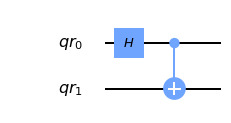

In [19]:

# Piirretään luotu piiri.
circuit.draw(output="mpl")


LISÄTIETOJA TEHTÄVÄN 1 RATKAISUISTA:


Tehtävän A ja B kohdan ratkaisut ovat ns. Bellin tiloja, jotka määritellään seuraavasti:


A)Kun alkuarvot ovat alkuarvoilla $\ket 1$ ja $\ket 0$, niin saadaan $\ket {\phi^-}=\frac{1}{\sqrt 2}(\ket{00}-\ket{11}$

B) a)Kun alkuarvot ovat alkuarvoilla $\ket 0$ ja $\ket 1$, niin saadaan $\ket {\psi^+}=\frac{1}{\sqrt 2}(\ket{01}+\ket{10}$ 

a)Kun alkuarvot ovat alkuarvoilla $\ket 1$ ja $\ket 1$, niin saadaan $\ket {\psi^-}=\frac{1}{\sqrt 2}(\ket{01}-\ket{10}$


Vektorit $\ket {\phi^+}$ ja $\ket {\phi^-}$ sekä $\ket {\psi^+}$ ja $\ket {\psi^-}$ ovat ns ortonormaaleja Bellin kantavektoreita, joita voidaan käyttä kvanttipiirin tilan kuvauksessa. Kun Bellin kantavektorit laskettiin kahden kubitin alkutiloista suoritetiin ns. kannan vaihto.  H ja CNOT-porttien avulla toteutettu kannan vaihto on unitaarinen, koska käytetyt portit ovat unitaarisia.


In [23]:
# Kopioi tähän halutessasi yllä oleva koodiesimerkki ja tulosta arvoja eri input-arvoilla.
# Voit tehdä tehtävän myös suoraan yllä olevaan koodilaatikkoon, ja muokata siinä input-arvoja.

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Tehtävä 2
Tehtävässä kaksi lasketaan ket-notaaation kautta vaiheittain kvanttipiirin kvanttitilan teleportaatio, johon tutustutttiin kierroksella 3. Tehtävässä on paljon tarinaa mutta vähän laskemista.

### Quantum teleportation eli kvanttiteleportaatio
Kvanttiteleportaation avulla voidaan siirtää kubitin tila fyysisesti kauas tietyillä esivalmisteluilla. Kvanttiteleportaatio perustuu kubittien lomittumiseen, eli kubittien väliseen kytkentään kvanttisysteemissä.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teleportaatio.png" width="500">

Yllä olevassa kvanttipiirissä siirretään kubitin 0 tila $\ket \psi$ kubittiin 2, paikasta A paikkaan B.

Alkutilan määrittely eli alkutilan preparointi:

Paikassa A olevan kubitti 0 on preparoitu tilojen $\ket 0$ ja $\ket 1$ superpositioon:

$$
\ket \psi  =a\ket 0 + b \ket 1
$$

Kertoimille $a$ ja $b$ on voimassa ehto $a^2+b^2=1$. 

Teleportaatiossa kubitin 0 tila $\ket \psi$ kopioidaan kubittiin 2 seuraavien vaiheiden kautta:

1) Luodaan kubitin 1 ja 2 välille ns. jaettu Bellin pari kubittien 1 ja 2 välille eli lomitus Hadamard- ja CNOT-porttien avulla tehtävän 1 mukaisesti, jonka jälkeen kubitin 1 ja 2 muodostaman systeemin tila voidaan kuvata nyt Bellin kantavektorin $\ket {\phi^+}$ avulla:

<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/bell_pair.png" width="150">

$$
\ket {\phi^+}=\frac{1}{\sqrt 2}(\ket{00}+\ket{11}
$$


2) Muodosta seuraavaksi paikassa A kubittien 0 ja 1 (Bellin pari A) tilojen yhdistelmä laskemalla tilojen $\ket \psi$ ja $\ket {\phi^+}$ tulo eli laske osittelulain avulla:
<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/bell_entg.png" width="150">

$$
(a\ket 0 + b \ket 1)(\frac{1}{\sqrt 2}(\ket{00}+\ket{11})=\text{... sievennä tulo auki tähän..}
$$


3) Laske kuinka CNOT-portin vaikutus systeemin tilavektoriin eli muodosta kubitin 0 lomitus kubitin 1 kanssa. Kubitti 0 on ohjaavakubitti, ja A:n puolikas Bellin parista on kohdekubitti. 

$$
(\frac{a}{\sqrt 2}a\ket {000} + \frac{a}{\sqrt 2}\ket {011}+\frac{b}{\sqrt 2}\ket {100}+\frac{b}{\sqrt 2}\ket {111}
\xrightarrow{\text{CNOT}}\text{... laske CNOT -portin vaikutus  tähän..}
$$


Seuraavaksi paikassa A mitataan Kubittien 0 ja 1 tilat mitatataan ja klassiset mittaustulokset lähetetään paikkaan B. Mittausoperaation jälkeen kubitti tuhoutuu. Mittaustuloksista riippuen paikassa B tehdään eri sarja operaatioita kubitille 2.

4) Tarkastellaan ensin kubitin 1 tilan mittausta paikassa A. 
<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/bell_measure1.png" width="150">

Kubittia 1 esittää on tilavektorin keskimmäisen bitti: 
$$
(\frac{a}{\sqrt 2}\ket {000} + \frac{a}{\sqrt 2}\ket {011}+\frac{b}{\sqrt 2}\ket {110}+\frac{b}{\sqrt 2}\ket {101}
$$

Keskimmäisen kubitin 1 tilan mittauksen mahdolliset lopputulokset ja jäljelle jäävien kubittien 0 ja 2 muodostaman systeemin tila paikassa B:

$$
0 \rightarrow \frac{a}{\sqrt 2}\ket {00} + \frac{b}{\sqrt 2}\ket {11}
$$
$$
1 \rightarrow \frac{a}{\sqrt 2}\ket {01} + \frac{b}{\sqrt 2}\ket {10}
$$

Ylempi rivi: Jos keskimäinen kubitin 1 tilaksi mitattiin $0$, niin mittaustuloksen ilmoittamisen jälkeen paikassa B ei tarvitse tehdä kubitin 2 tilalle mitään, koska kubitin 2 tila on sama kuin alkuperäisen lähetettävän kubitin 0 tila. 

Alempi rivi: Jos keskimmäisen kubitin 1 tilaksi mitattiin $1$, niin paikassa B kubitin 2 tila on käännettävä X-portilla, jonka jälkeen kubitin 2 tila on sama kuin alkuperäinen kubitin 0 tila. 


Lopputuloksena kubitin 2 tila on sama kuin kubitin 0 alkuperäinen tila $a\ket 0 + b \ket 1$.

5) Tarkastellaan vielä kubitin 0 tilan mittausta paikassa A H-portilla operoimisen jälkeen.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teleportaatio.png" width="250">


Kun kubittiin 0 operoidaan H-portilla, tarkoittaa tämä että tehdään kubitin 0 tilalle $\ket \psi$ kannanvaihto, jolloin uudet käytettävät kantavektorit ovat 2.kerroksen $\ket +$ ja $\ket -$ -vektorit. Kubittien 0 ja 2 muodostaman systemin ( kubitti 1 tuhoitui 1. tarkasteltavassa mittauksessa) tila voidaan kuvata siis muodossa:


$$
a\ket{00}+b\ket{11}=
\frac{a}{\sqrt 2}(\ket{+} + \ket {-})(\ket 0)+\frac{b}{\sqrt 2}(\ket{+} - \ket {-})(\ket 1)
$$

$$
=\frac{1}{\sqrt 2}(\ket{+})(a\ket 0 +b \ket 1)+\frac{1}{\sqrt 2}(\ket{-})(a \ket{0}-b(\ket 1)
$$

Keskimmäisen kubitin 0 tilan mittauksen mahdolliset lopputulokset ja jäljelle jäävän kubitin 2 tila paikassa B:

$$
 + \rightarrow (a\ket 0 +b \ket 1)
$$
$$
-  \rightarrow (a \ket{0}-b\ket 1)
$$

Ylempi rivi: Jos kubitin 0 tilaksi mitattiin +, niin mittaustuloksen ilmoittamisen jälkeen paikassa B ei tarvitse tehdä kubitin 2 tilalle mitään, koska kubitin 2 tila on sama kuin alkuperäisen lähetettävän kubitin 0 tila. 

Alempi rivi: Jos  kubitin 0 tilaksi mitattiin -, niin paikassa B kubitin 2 tila on käännettävä Z-portilla, jonka jälkeen kubitin 2 tila on sama kuin alkuperäinen kubitin 0 tila. 

Tehtävä: Operoi ket-esityksessä tai matriisiesityksessä kubitin 2 tilaan $a \ket{0}-b\ket 1$ portilla Z ja näytä että kubitin 2 tila muuttuu tällöin kubitin 0 alkuperäiseksi tilaksi.  Z-portti ei vaikuta tilaan $\ket 0$, mutta tilan $\ket 1$ Z-portti muuttaa tilaksi $-\ket 1$ . 






In [ ]:
# Kirjoita koodisi tähän, tai rakenna koodi erilliseen tiedostoon.


## Tehtävä 3: Unitaarinen matriisi

Kompleksinen matriisi $A$ on unitaarinen, jos sen kompleksikonjukaatin transpoosi on $A$:n käänteismatriisi , eli

$$
A^{-1}=  \overline{A}^{T} = A^{\dagger}
$$

Kun matriisi $A$ on unitaarinen, on kuvaus $y=Ax$ unitaarinen kuvaus.

Reaalimatriisi $A$ on unitaarinen, jos $A$:n transpoosi on $A$:n käänteismatriisi eli 

$$
A^{-1}=A^{T}.
$$

Esimerkki:
Olkoon
$$
A= \frac{1}{\sqrt 2} \pmatrix {1 & 1 \\ -1 & 1} 
$$

jolloin $A$:n käänteismatriisi on
$$
A^{-1}=A^{T} =\frac{1}{\sqrt 2} \pmatrix {1 & -1 \\ 1 & 1} 
$$

Kun matriisi $A$ transponoidaan, niin 1. vaakarivi muuttuu 1. pystyriviksi, ja 2. vaakarivi muuttuu 2. pystyriviksi.

Tehtävä: Tutki onko ns. Pauli Y -matriisi eli Y-portin toimintaa kuvaava matriisi unitaarinen? Paulin Y-matriisi määritellään seuraavasti:


$$
Y=  \pmatrix {0 & -i \\ i & 0} 
$$


missä $i$ on imaginääriyksikkö.


Ohje:
1) Muodosta ensin matriisin $Y$ kompleksikonjukaatti $\overline{Y}$ vaihtamalla imaginääriosien etumerkki. 2) Transponoi kompleksikonjugaatti, eli laske $\overline{Y}^T=Y^\dagger$. 3) Laske tulo $YY^{\dagger}$, ja tutki onko tulos identtinen matriisi:

$$
YY^{\dagger}= I
$$
missä $I$ on identtinen matriisi.


<a href="http://math.tkk.fi/opetus/p3/04/L/L1printit.pdf" target="_blank">Kompleksilukujen laskutoimitukset</a>




Voit kirjoittaa vastauksesi tähän.



## Tehtävä 4: Tensoritulo

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teht4_X.png" width=120>

Kuvassa esitetään kahden kubitin piiri. Molemmat kubitit ovat ensin tilassa $\ket 0$, jonka jälkeen niihin operoidaan Hadamard-portilla. Kubitit eivät ole lomittuneita, eli niiden välillä ei ole kytkentää, koska esimerkiksi CNOT-porttia ei käytetä. Molempien kubittien tila voidaan esittää erikseen seuraavasti:

$$
\ket + = \frac 1 {\sqrt 2} (\ket 0 + \ket 1)
$$

Piirin ajon jälkeen koko systeemin tila voitaisiin esittää seuraavissa yhtäpitävissä muodoissa, jotka esittävät samaa tilaa eri notaatioilla:

$$
\ket{++} = \ket + \ket + = \ket + \otimes \ket +,
$$

missä operaattori $\otimes$ merkitsee kvanttitilojen välistä tensorituloa.

Lasketaan nyt tensoritulo auki tavalliseen $\ket 0$ ja $\ket 1$ muodostamaan binäärikantaan:

$$
\ket + \otimes \ket + = \frac 1 {\sqrt 2} (\ket 0 + \ket 1) \otimes \frac 1 {\sqrt 2} (\ket 0 + \ket 1) \\
= \left(\frac 1 {\sqrt 2}\right)^2 (\ket 0 \otimes \ket 0 + \ket 0 \otimes \ket 1 + \ket 1 \otimes \ket 0 + \ket 1 \otimes \ket 1)
$$

Yllä tensoritulo suoritettiin siinä mielessä samalla tavalla kuin tavallinen tulo, että summatermien tulo avattiin osittelulain mukaisesti. Samaan tapaan kuin aiemmin, merkinnät $\ket{00}$, $\ket 0 \ket 0$ ja $\ket 0 \otimes \ket 0$ tarkoittavat samaa asiaa, eli:

$$
= \frac 1 2 (\ket{0}\ket{0} + \ket{0}\ket{1} + \ket{1}\ket{0} + \ket{1}\ket{1}) \\
= \frac 1 2 (\ket{00} + \ket{01} + \ket{10} + \ket{11})
$$

Kierroksen 2 kahden kubitin tilat esitettiin pystyvektoreina. Tämäkin lauseke voidaan esittää pystyvektorien avulla:

$$
= \frac 1 2 \left(\pmatrix{1 \\ 0 \\ 0 \\ 0} + \pmatrix{0 \\ 1 \\ 0 \\ 0} + \pmatrix{0 \\ 0 \\ 1 \\ 0} + \pmatrix{0 \\ 0 \\ 0 \\ 1} \right)
= \frac 1 2 \pmatrix {1\\1\\1\\1}
$$

### Tehtävä

Esitä alla näkyvän piirin tila, eli tila $\ket{-+}$, binäärimuotoisten kantavektoreiden avulla. Käytä esimerkkiä apuna. Käytä ket-vektoriesitystä, pystyvektoriesitystä ei tarvitse laskea.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/teht4_H.png" width=160>

Kertauksena: $\ket - = \frac 1 {\sqrt 2} (\ket 0 - \ket 1)$



Kirjoita vastaus tähän. Ket-merkintä onnistuu | ja > -merkeillä: |10>

